# 🗿📄✂️ Rock/Paper/Scissors Image Recognition
---

Given images of hands playing *rock/paper/scissors*, let's try to predict **what sign is a doing a given hand**.

A Tensorflow/Keras CNN will be used in this Notebook. Data Augmentation will be applied to the dataset.

# Getting Started

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
train_dir = '/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors/train'
test_dir = '/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors/test'

# Visualizing Image Augmentation

In [3]:
sample_generator = ImageDataGenerator(
    rescale=1./255,
    vertical_flip=True,
    horizontal_flip=True,
    rotation_range=90,
    height_shift_range=0.2,
    width_shift_range=0.2,
    zoom_range=0.2,
    fill_mode='constant'
)

sample_images = sample_generator.flow_from_directory(
    train_dir,
    target_size=(300, 300),
    color_mode='rgb',
    class_mode=None,
    batch_size=1,
    shuffle=True,
    seed=42
)

Found 2520 images belonging to 3 classes.


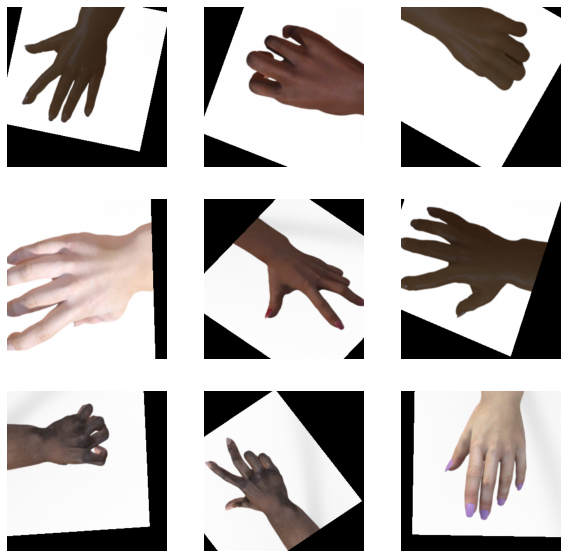

In [4]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = sample_images.next()[0]
    plt.imshow(img)
    plt.axis('off')
plt.show()

Here we use *fill_mode='constant'* for the sake of vizualization. *'nearest'* will be used for the next gererators.

# Creating Generators

In [5]:
train_generator = ImageDataGenerator(
    rescale=1./255,
    vertical_flip=True,
    horizontal_flip=True,
    rotation_range=90,
    height_shift_range=0.2,
    width_shift_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

test_generator = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.7
)

In [6]:
train_images = train_generator.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)

val_images = test_generator.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

test_images = test_generator.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42,
    subset='validation'
)

Found 2520 images belonging to 3 classes.
Found 114 images belonging to 3 classes.
Found 258 images belonging to 3 classes.


# Training

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
79/79 [==============================] - 35s 436ms/step - loss: 1.0971 - accuracy: 0.3603 - val_loss: 1.0992 - val_accuracy: 0.3333
Epoch 2/100
79/79 [==============================] - 24s 309ms/step - loss: 1.0766 - accuracy: 0.3937 - val_loss: 1.0964 - val_accuracy: 0.3333
Epoch 3/100
79/79 [==============================] - 25s 311ms/step - loss: 0.9432 - accuracy: 0.5202 - val_loss: 0.5904 - val_accuracy: 0.7105
Epoch 4/100
79/79 [==============================] - 24s 308ms/step - loss: 0.7253 - accuracy: 0.6778 - val_loss: 0.4829 - val_accuracy: 0.8596
Epoch 5/100
79/79 [==============================] - 24s 309ms/step - loss: 0.5474 - accuracy: 0.7667 - val_loss: 0.3225 - val_accuracy: 0.9386
Epoch 6/100
79/79 [==============================] - 24s 300ms/step - loss: 0.4389 - accuracy: 0.8310 - val_loss: 0.1317 - val_accuracy: 1.0000
Epoch 7/100
79/79 [==============================] - 24s 306ms/step - loss: 0.3248 - accuracy: 0.8742 - val_loss: 0.1533 - val_accuracy:

# Results

In [26]:
y_pred = np.argmax(model.predict(test_images), axis=1)
y_true = test_images.labels
test_images.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [43]:
acc = accuracy_score(y_true, y_pred)
print("Accuracy = {:.2f}%".format(acc*100))

Accuracy = 94.19%


In [27]:
cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])
clr = classification_report(y_true, y_pred, labels=[0, 1, 2], target_names=['Paper', 'Rock', 'Scissors'])

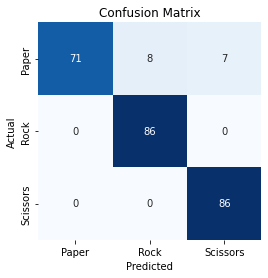

              precision    recall  f1-score   support

       Paper       1.00      0.83      0.90        86
        Rock       0.91      1.00      0.96        86
    Scissors       0.92      1.00      0.96        86

    accuracy                           0.94       258
   macro avg       0.95      0.94      0.94       258
weighted avg       0.95      0.94      0.94       258



In [44]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=['Paper', 'Rock', 'Scissors'])
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=['Paper', 'Rock', 'Scissors'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(clr)